In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import scipy.ndimage

In [2]:
file = np.load('Lmixing/fig3.npz')
X = file['arr_0']
Y = file['arr_1']
Z1 = file['arr_2']
Z2 = file['arr_3']
Z3 = file['arr_4']

In [3]:
Za = Z2/Z1 - 1
Zb = Z3/Z1 - 1
np.place(Za, Za <  -1, [-1])
np.place(Zb, Zb <  -1, [-1])
Zam = scipy.ndimage.zoom(Za,5)
Zbm = scipy.ndimage.zoom(Zb,5)
Xm = scipy.ndimage.zoom(X,5)
Ym = scipy.ndimage.zoom(Y,5)

In [4]:
x = [10**x for x in range(-1,4)]
y = [230*pow(x,1/4) for x in x]
print(x,y)

[0.1, 1, 10, 100, 1000] [129.3385047937803, 230.0, 409.00426430895226, 727.3238618387273, 1293.385047937803]


In [5]:
np.transpose(Z2)[5]

array([5.66015316e+01, 2.13781346e+02, 8.38915226e+02, 3.21579486e+03,
       1.14722528e+04, 4.18411117e+04, 1.45241926e+05, 4.66210125e+05,
       1.34774278e+06, 3.12590252e+06, 4.81522604e+06, 3.40266239e+06,
       1.22457671e+06])

In [6]:
clrs1=['blue','gray','orange','red','green','magenta']
clrs2=['blue','magenta','green','red','orange','gray']
bg=(0.1,0.1,0.1,0.)

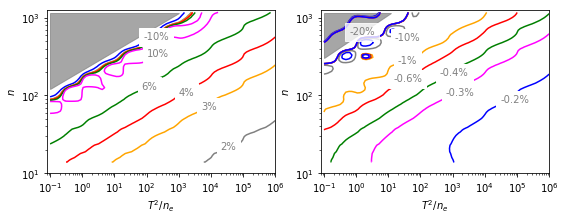

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 3))
CS1 = ax1.contour(Xm,Ym, Zbm, [-0.10,0.02, 0.03,0.04,0.06,0.1], colors=clrs1)
CS2 = ax2.contour(Xm,Ym, Zam, [-0.2, -0.1, -0.01,-0.006,-0.004,-0.003,-0.002], colors=clrs1)
bg= (1.,1.,1.,0.8)

ax1.annotate("2%",xy=(2e4, 20),backgroundcolor='white', color='gray')
ax1.annotate("3%",xy=(5e3, 65),backgroundcolor='white', color='gray')
ax1.annotate("4%",xy=(1e3, 100),backgroundcolor='white', color='gray')
ax1.annotate("6%",xy=(70, 120),backgroundcolor='white', color='gray')
ax1.annotate("10%",xy=(100, 320),backgroundcolor='white', color='gray')
ax1.annotate("-10%",xy=(80, 520),backgroundcolor='white', color='gray')
ax1.fill([0.1,0.1,1000],[120,1160,1160],c='gray',alpha=0.7)

ax2.annotate("-0.2%",xy=(3e4, 80),backgroundcolor='white', color='gray')
ax2.annotate("-0.3%",xy=(600, 100),backgroundcolor='white', color='gray')
ax2.annotate("-0.4%",xy=(400, 180),backgroundcolor='white', color='gray')
ax2.annotate("-0.6%",xy=(14, 150),backgroundcolor='white', color='gray')
ax2.annotate("-1%",xy=(20, 260),backgroundcolor='white', color='gray')
ax2.annotate("-10%",xy=(16, 500),backgroundcolor='white', color='gray')
ax2.annotate("-20%",xy=(0.6, 600),backgroundcolor=bg, color='gray')
ax2.fill([0.1,0.1,12],[300,1160,1160],c='gray',alpha=0.7)

ax1.set_xscale('log')
ax1.set_xbound(0.08,1.e6)
ax1.set_xlabel(r'$T^2/n_e$')
ax1.set_yscale('log')
ax1.set_ybound(10,1240)
ax1.set_ylabel(r'$n$')
ax2.set_xscale('log')
ax2.set_xbound(0.08,1.e6)
ax2.set_xlabel(r'$T^2/n_e$')
ax2.set_yscale('log')
ax2.set_ybound(10,1240)
ax2.set_ylabel(r'$n$')

plt.savefig("fig-map.pdf", format='pdf',bbox_inches='tight')